In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import torch
from tqdm import tqdm as tqdm

import wandb
from elastic_nerf.nerfacc.radiance_fields.ngp import (
    NGPRadianceField,
    NGPRadianceFieldConfig,
)
from elastic_nerf.utils import dataset_utils as du
from elastic_nerf.utils import notebook_utils as nu
from elastic_nerf.utils import plotting_utils as pu
from elastic_nerf.utils import results_utils as ru
from elastic_nerf.utils import wandb_utils as wu
from elastic_nerf.utils.experiments.sweeps import SWEEPS

pio.renderers.default = "plotly_mimetype+notebook_connected"
pd.set_option("display.max_columns", None)

In [ ]:
sweep_id = "w488d29q"

# Get the runs from sweep.
tables = ["EvalResultsSummarytable", "EvalResultstable"]
wu.remove_sweep_results_cache(sweep_id)
ngp_occ_blender_results = wu.fetch_sweep_results(
    sweep_id, refresh_cache=True, download_weights_grads=True
)

  0%|          | 0/39 [00:00<?, ?it/s]













  3%|▎         | 1/39 [00:12<08:07, 12.82s/it]















































































  5%|▌         | 2/39 [01:16<26:31, 43.01s/it]

































































































































































  8%|▊         | 3/39 [02:15<30:08, 50.22s/it]










































































































































































 10%|█         | 4/39 [03:14<31:22, 53.77s/it]






























































































































































 13%|█▎        | 5/39 [04:19<32:39, 57.63s/it]






































































































































































 15%|█▌        | 6/39 [05:23<32:51, 59.75s/it]







































































 36%|███▌      | 14/39 [16:12<28:56, 69.45s/it]A
(gonas) [ERROR] An error occurred while fetching run aq3euasd: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 33%|███▎      | 13/39 [16:05<32:10, 74.25s/it]A
(gonas) [ERROR] An error occurred while fetching run lb7ss2j6: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 38%|███▊      | 15/39 [16:22<26:11, 65.47s/it]
(gonas) [ERROR] An error occurred while fetching run e3pz30qh: CUDA out of memory. Tried to




















 33%|███▎      | 13/39 [16:29<32:58, 76.11s/it]A
(gonas) [ERROR] An error occurred while fetching run yxgs90fl: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 38%|███▊      | 15/39 [16:39<26:38, 66.62s/it]A
(gonas) [ERROR] An error occurred while fetching run szt53wvx: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 36%|███▌      | 14/39 [16:38<29:43, 71.35s/it]
(gonas) [ERROR] An error occurred while fetching run 99poosnb: CUDA out of memory. Tried to




















 38%|███▊      | 15/39 [16:42<26:43, 66.81s/it]A
(gonas) [ERROR] An error occurred while fetching run 3uxsoxyl: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 36%|███▌      | 14/39 [16:43<29:51, 71.65s/it]
(gonas) [ERROR] An error occurred while fetching run caklteez: CUDA out of memory. Tried to allocate 50.00 Mi






































 38%|███▊      | 15/39 [16:44<26:46, 66.96s/it]A
(gonas) [ERROR] An error occurred while fetching run 1tr8v17t: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 38%|███▊      | 15/39 [16:44<26:47, 66.99s/it]A
(gonas) [ERROR] An error occurred while fetching run egir8lsk: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 38%|███▊      | 15/39 [16:39<26:39, 66.64s/it]A
(gonas) [ERROR] An error occurred while fetching run 7pqmuw7e: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF





















 41%|████      | 16/39 [16:58<24:24, 63.66s/it]A
(gonas) [ERROR] An error occurred while fetching run dl2jtisb: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 38%|███▊      | 15/39 [16:45<26:49, 67.04s/it]
(gonas) [ERROR] An error occurred while fetching run p7afcuvc: CUDA out of memory. Tried to allocate 50.00 Mi




















 38%|███▊      | 15/39 [16:49<26:54, 67.28s/it]A
(gonas) [ERROR] An error occurred while fetching run ztq19iqr: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 38%|███▊      | 15/39 [16:45<26:48, 67.03s/it]A
(gonas) [ERROR] An error occurred while fetching run ux43iyvw: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 38%|███▊      | 15/39 [16:51<26:58, 67.44s/it]
(gonas) [ERROR] An error occurred while fetching run 3j51c6rp: CUDA out of memory. Tried to




















 38%|███▊      | 15/39 [16:53<27:01, 67.56s/it]A
(gonas) [ERROR] An error occurred while fetching run m2jpab2y: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 38%|███▊      | 15/39 [16:49<26:55, 67.31s/it]A
(gonas) [ERROR] An error occurred while fetching run 7gnc9mnn: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 38%|███▊      | 15/39 [16:54<27:03, 67.65s/it]
(gonas) [ERROR] An error occurred while fetching run s7vvmvdo: CUDA out of memory. Tried to




















 38%|███▊      | 15/39 [16:56<27:06, 67.75s/it]A
(gonas) [ERROR] An error occurred while fetching run i50o37p5: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































 41%|████      | 16/39 [17:07<24:37, 64.23s/it]A
(gonas) [ERROR] An error occurred while fetching run m9xhztrp: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 38%|███▊      | 15/39 [16:58<27:09, 67.88s/it]
(gonas) [ERROR] An error occurred while fetching run cauvbtcy: CUDA out of memory. Tried to




















 38%|███▊      | 15/39 [16:59<27:10, 67.95s/it]A
(gonas) [ERROR] An error occurred while fetching run e1u3kcjo: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
 41%|████      | 16/39 [17:07<24:37, 64.23s/it]
(gonas) [ERROR] An error occurred while fetching run mnsir9w4: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 Mi




















  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run jwps1v5t: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [00:59<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run 87l0osdc: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:00<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run jj2hfnp5: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run rea2ecop: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run nj65mr75: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:03<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run 25gx1w3a: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
  0%|          | 0/39 [01:01<?, ?it/s]
(gonas) [ERROR] An error occurred while fetching run za3l4ndu: CUDA out of memory. Tried to allocate 50.00 Mi






































  0%|          | 0/39 [01:02<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run j128w9iq: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF





















  0%|          | 0/39 [01:02<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run 8zhv3qw1: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
  0%|          | 0/39 [01:02<?, ?it/s]
(gonas) [ERROR] An error occurred while fetching run 2wy2ia3n: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 Gi






































  0%|          | 0/39 [01:02<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run wo169kgy: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF





















  0%|          | 0/39 [01:03<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run jmurb5ym: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF





















  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run qlrb1zsf: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
  0%|          | 0/39 [00:59<?, ?it/s]
(gonas) [ERROR] An error occurred while fetching run a9f92tnu: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 Gi






































  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run qbk2hhse: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:01<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run c9q3pzhb: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF







































  0%|          | 0/39 [01:03<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run nzy5e6xy: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
  0%|          | 0/39 [01:01<?, ?it/s]
(gonas) [ERROR] An error occurred while fetching run 4nod4jbc: CUDA out of memory. Tried to allocate 50.00 Mi






































  0%|          | 0/39 [01:00<?, ?it/s]A
(gonas) [ERROR] An error occurred while fetching run n0vtz8bj: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
(gonas) [ERROR] Failed to fetch a run due to: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 47.54 GiB total capacity; 44.63 GiB already allocated; 269.75 MiB free; 46.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
  0%|          | 0/39 [00:59<?, ?it/s]
(gonas) [ERROR] An error occurred while fetching run vd2erlx8: CUDA out of memory. Tried to allocate 50.00 Mi

# Explore spectral norm 

In [ ]:
run = wu.fetch_run("aq4f5ufl")
filter_fn = lambda x: x.name.endswith(".pt") and "weights_grads" in x.name
run_weights_grads = wu.RunResult.download_weights_grads(run, filter_fn)

39it [01:38,  2.54s/it]


In [ ]:
ordered_steps = sorted(list(run_weights_grads["radiance_field"].keys()))
radiance_fields = run_weights_grads["radiance_field"]
print(run_weights_grads)

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500]
defaultdict(<class 'dict'>, {'radiance_field': {1000: {'params': OrderedDict([('aabb', tensor([-1.5000, -1.5000, -1.5000,  1.5000,  1.5000,  1.5000], device='cuda:0')), ('direction_encoding.params', tensor([], device='cuda:0')), ('mlp_base.encoding.params', tensor([-3.9030e-02,  2.5807e-02, -1.2177e-07,  ...,  4.6400e-03,
         2.3618e-02, -3.4991e-03], device='cuda:0')), ('mlp_base.elastic_mlp.hidden_layers.0.weight', tensor([[-0.4147,  0.4121, -0.3420,  ..., -0.3262,  0.2138,  0.0370],
        [ 0.6530, -0.3418,  0.4532,  ..., -0.0690,  0.2276,  0.2381],
        [ 0.1035,  0.1366,  0.1412,  ...,  0.2177, -0.2514, -0.0034],
        ...,
        [ 0.0673,  0.2280, -0.0741,  ..., -0.2435,  0.2053,  0.1632],
        [-0.0501,  0.3059, 

In [ ]:
del '_target' in run.config

{'scene': 'ficus',
 'device': 'cuda:0',
 '_target': '__main__.NGPOccTrainer',
 'dataset': {'name': 'blender',
  'scene': 'ficus',
  'data_root': '/home/user/shared/nerfstudio/data/blender',
  'far_plane': 10000000000.0,
  'grid_nlvl': 1,
  'alpha_thre': 0,
  'cone_angle': 0,
  'near_plane': 0,
  'aabb_coeffs': [-1.5, -1.5, -1.5, 1.5, 1.5, 1.5],
  'train_split': 'train',
  'optimizer_lr': 0.01,
  'weight_decay': 1e-05,
  'optimizer_eps': 1e-15,
  'subject_loader': 'elastic_nerf.nerfacc.datasets.nerf_synthetic.SubjectLoader',
  'grid_resolution': 128,
  'init_batch_size': 1024,
  'scheduler_gamma': 0.33,
  'test_chunk_size': 8192,
  'render_step_size': 0.005,
  'test_dataset_kwargs': {},
  'train_dataset_kwargs': {},
  'scheduler_total_iters': 100,
  'scheduler_start_factor': 0.01,
  'target_sample_batch_size': 262144,
  'num_dynamic_batch_warmup_steps': 20},
 'log_dir': '/home/user/shared/nerfstudio/wandb_cache',
 'exp_name': '2024-02-15-17-12-28',
 'max_steps': 20000,
 'hidden_dim': 64

In [ ]:
def compute_l1_norm(tensor):
    return tensor.abs().sum()


def compute_l2_norm(tensor):
    return torch.sqrt((tensor**2).sum())


def compute_frobenius_norm(tensor):
    return torch.norm(tensor, "fro")


def compute_spectral_norm(tensor):
    # For tensors that are not 2D, we need to reshape them appropriately.
    # The common approach is to view them as a matrix where one dimension is the 'feature' dimension
    # and the other aggregates all other dimensions.
    if tensor.dim() != 2:
        # Assume the first dimension is the 'feature' dimension and flatten the rest.
        tensor = tensor.view(tensor.size(0), -1)

    # Compute the spectral norm (largest singular value)
    u, s, v = torch.svd(tensor, compute_uv=False)
    return s.max().item()


def visualize_norms(norms_dict, title="Norms Visualization"):
    labels, values = zip(*norms_dict.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color="skyblue")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Norm Value")
    plt.tight_layout()
    plt.show()

mlp_base.elastic_mlp.hidden_layers.0.weight torch.Size([64, 32])
mlp_base.elastic_mlp.hidden_layers.0.bias torch.Size([64])
mlp_base.elastic_mlp.output_layer.weight torch.Size([16, 64])
mlp_base.elastic_mlp.output_layer.bias torch.Size([16])
mlp_base.elastic_mlp.hidden_layers.0.weight torch.Size([64, 32])
mlp_base.elastic_mlp.hidden_layers.0.bias torch.Size([64])
mlp_base.elastic_mlp.output_layer.weight torch.Size([16, 64])
mlp_base.elastic_mlp.output_layer.bias torch.Size([16])


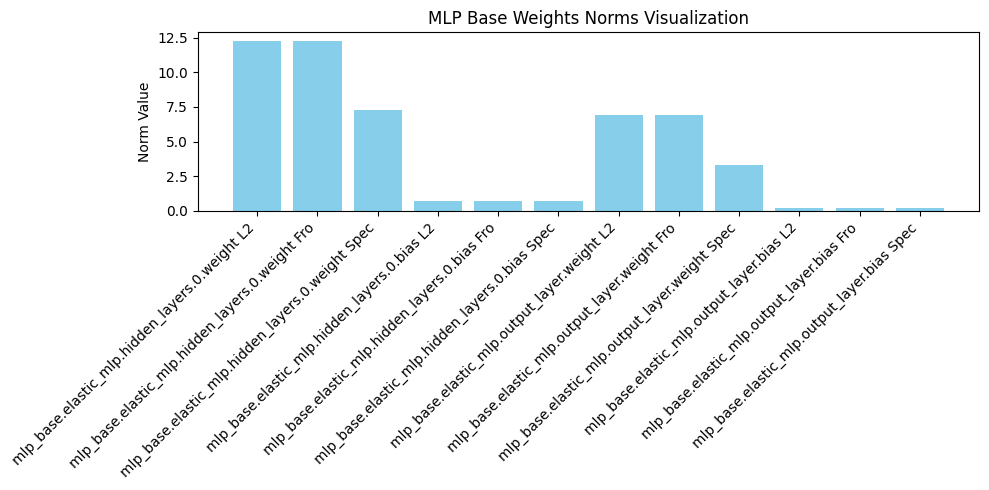

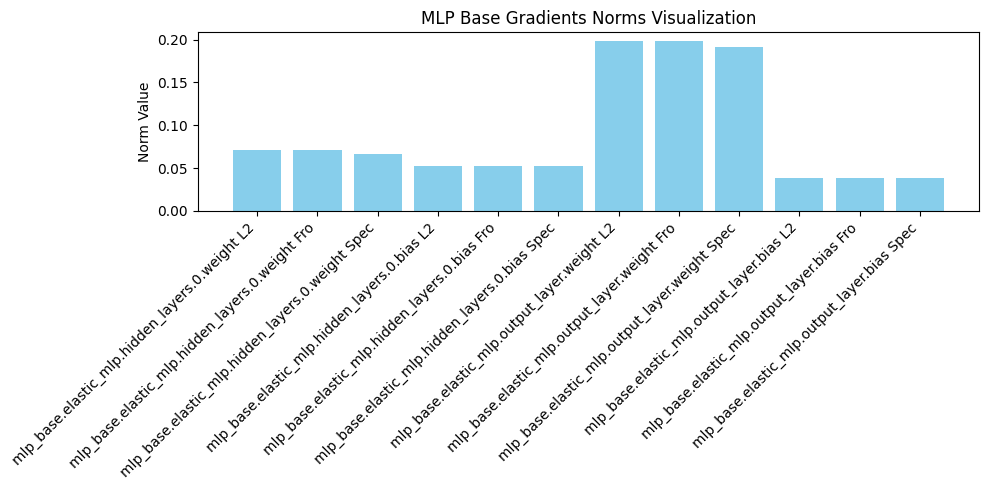

In [ ]:
# Filter 'mlp_base' parameters and gradients
mlp_base_params = {
    name: tensor
    for name, tensor in params_dict["params"].items()
    if name.startswith("mlp_base.elastic_mlp")
}
mlp_base_grads = {
    name: tensor
    for name, tensor in params_dict["gradients"].items()
    if name.startswith("mlp_base.elastic_mlp")
}

# Initialize dictionaries to store norms
weights_norms = {}
grads_norms = {}

# Compute norms for 'mlp_base' weights
for name, tensor in mlp_base_params.items():
    print(name, tensor.shape)
    # weights_norms[f'{name} L1'] = compute_l1_norm(tensor).item()
    weights_norms[f"{name} L2"] = compute_l2_norm(tensor).item()
    weights_norms[f"{name} Fro"] = compute_frobenius_norm(tensor).item()
    weights_norms[f"{name} Spec"] = compute_spectral_norm(tensor)

# Compute norms for 'mlp_base' gradients
for name, tensor in mlp_base_grads.items():
    print(name, tensor.shape)
    # grads_norms[f'{name} L1'] = compute_l1_norm(tensor).item()
    grads_norms[f"{name} L2"] = compute_l2_norm(tensor).item()
    grads_norms[f"{name} Fro"] = compute_frobenius_norm(tensor).item()
    grads_norms[f"{name} Spec"] = compute_spectral_norm(tensor)

# Visualize norms for 'mlp_base' weights and gradients
visualize_norms(weights_norms, "MLP Base Weights Norms Visualization")
visualize_norms(grads_norms, "MLP Base Gradients Norms Visualization")

In [ ]:
params_dict["params"]

OrderedDict([('aabb',
              tensor([-1.5000, -1.5000, -1.5000,  1.5000,  1.5000,  1.5000], device='cuda:0')),
             ('direction_encoding.params', tensor([], device='cuda:0')),
             ('mlp_base.encoding.params',
              tensor([-0.0524,  0.0649, -0.0417,  ..., -0.0345,  0.0275,  0.0005],
                     device='cuda:0')),
             ('mlp_base.elastic_mlp.hidden_layers.0.weight',
              tensor([[-0.2936,  0.3607, -0.1735,  ..., -0.4993,  0.4694,  0.2571],
                      [ 0.6481, -0.3079,  0.5560,  ..., -0.2090,  0.3847,  0.3557],
                      [ 0.4086, -0.5158,  0.4631,  ..., -0.1006,  0.0544,  0.0539],
                      ...,
                      [ 0.1088,  0.2196, -0.0533,  ..., -0.2910,  0.2519,  0.1855],
                      [ 0.0242,  0.2957,  0.1008,  ...,  0.1412, -0.1653, -0.0571],
                      [ 0.1781, -0.0493,  0.1350,  ...,  0.0667, -0.0790,  0.2647]],
                     device='cuda:0')),
           